# 사용 파이썬 점검

In [1]:
import sys
sys.version

'3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]'

In [2]:
import site
site.getsitepackages()

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\site-packages']

In [3]:
import matplotlib as mpl
print(mpl.__version__)

import numpy as np
print(np.__version__)

3.6.2
1.23.4


#### matplotlib 선명하게

In [4]:
%config InlineBackend.figure_format = 'retina'

#### 한글 처리

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

# lecture 22

In [6]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
next(data)

result = []

max_people = 0
max_station = ''
t = int(input('몇 시의 승차인원이 가장 많은 역이 궁금하세요? : '))

for row in data :
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
        
    row[4:] = map(int, row[4:])
    people = row[2*t - 4]
    if people > max_people:
        max_people = people
        max_station = row[3] + '(' + row[1] + ')'

f.close()

print(max_station, ':', max_people, '명')

신림(2호선) : 267240 명


In [7]:
import csv

f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
next(data)

result = []

max_people = [0] * 24
max_station = [''] * 24

for row in data :
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
        
    row[4:] = map(int, row[4:])
    for j in range(24):
        people = row[2 * j + 4]
        if people > max_people[j]:
            max_people[j] = people
            max_station[j] = row[3]

f.close()

print(max_station)
print(max_people)

['구로', '부천', '신림', '신림', '신림', '신림', '신림', '잠실(송파구청)', '잠실(송파구청)', '잠실(송파구청)', '잠실(송파구청)', '잠실(송파구청)', '잠실(송파구청)', '강남', '강남', '강남', '잠실(송파구청)', '홍대입구', '홍대입구', '홍대입구', '홍대입구', '신대방', '건대입구', '']
[14749, 43625, 70319, 180549, 267240, 168111, 97808, 91089, 102391, 112715, 122820, 147107, 170108, 248211, 310065, 209257, 178475, 196580, 188444, 96089, 11671, 12, 2, 0]


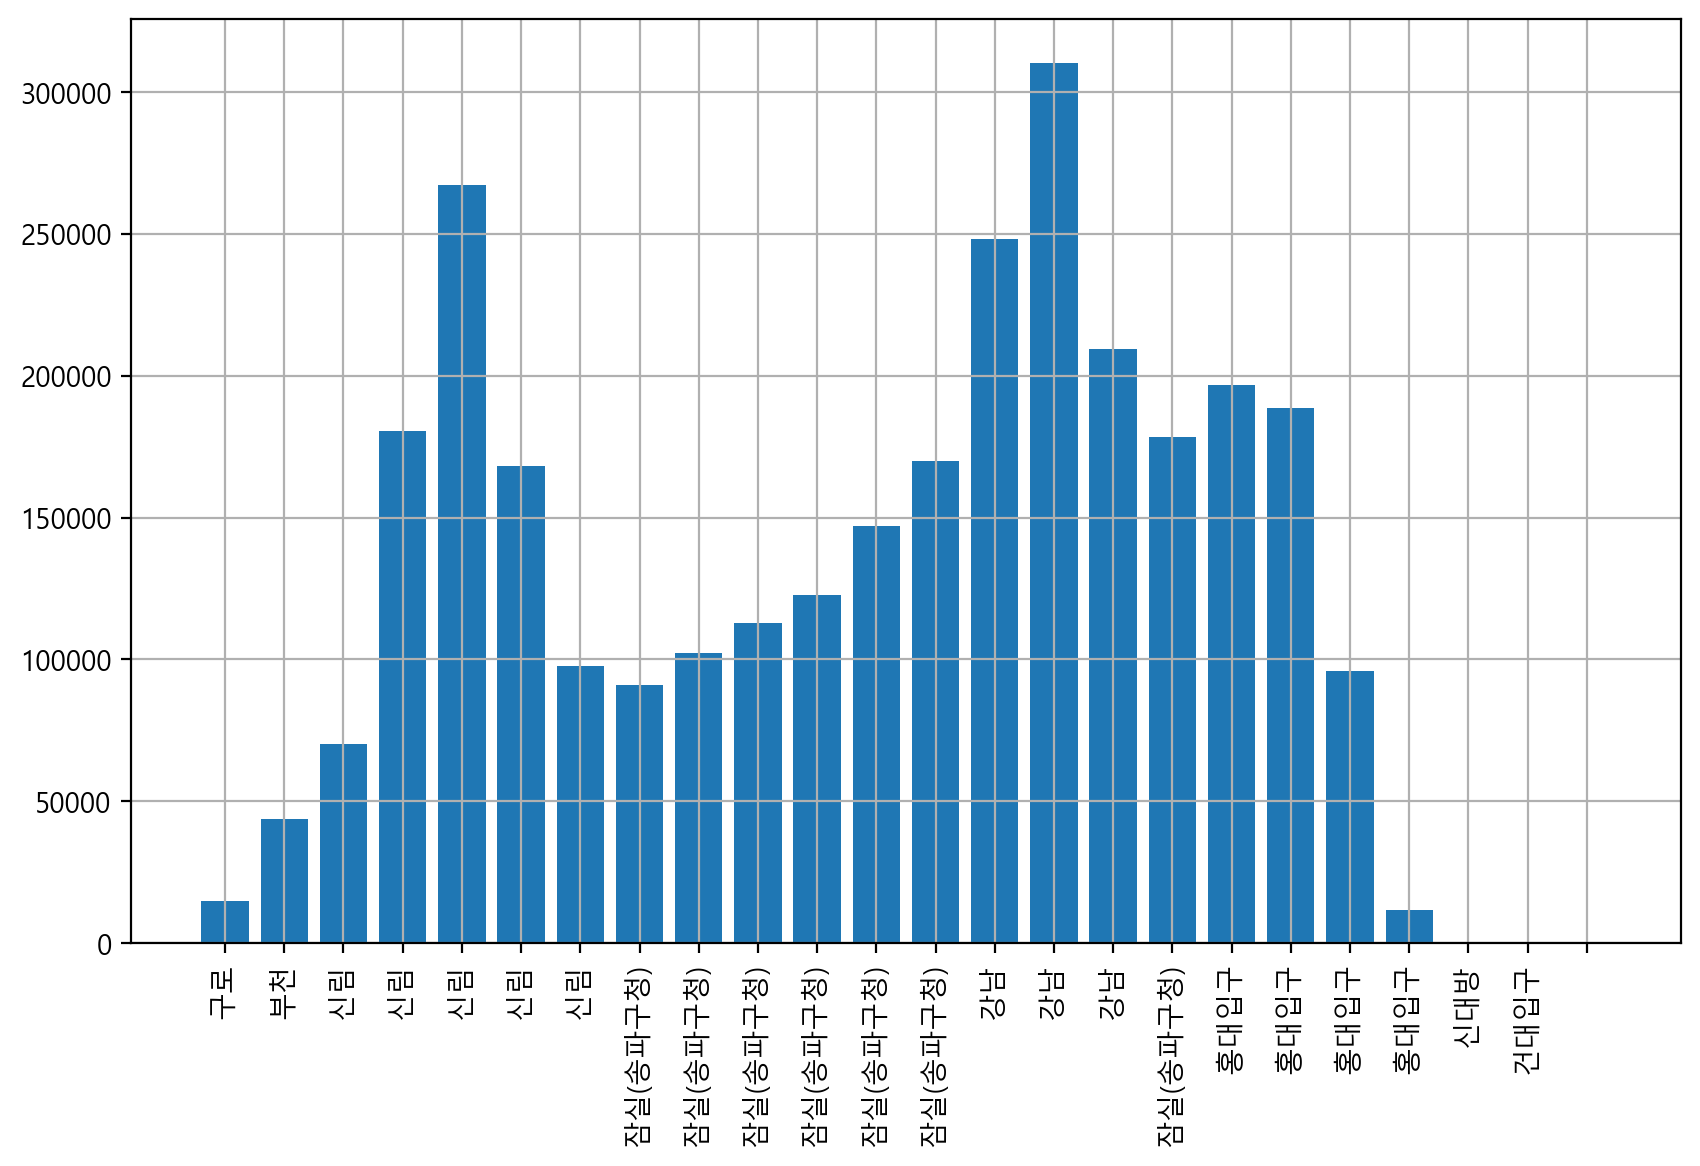

In [8]:
# 시간대별 최대 승차 역 이름 및 승차 인원 막대그래프로 시각화
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
next(data)

max_people = [0] * 24
max_station = [''] * 24

for row in data :
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
        
    row[4:] = map(int, row[4:])
    for j in range(24):
        people = row[2 * j + 4]
        if people > max_people[j]:
            max_people[j] = people
            max_station[j] = row[3]

f.close()

plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(10, 6))
# plt.style.use('ggplot')
plt.bar(range(24), max_people)
plt.xticks(range(24), max_station, rotation=90)
plt.grid(True)
plt.show()

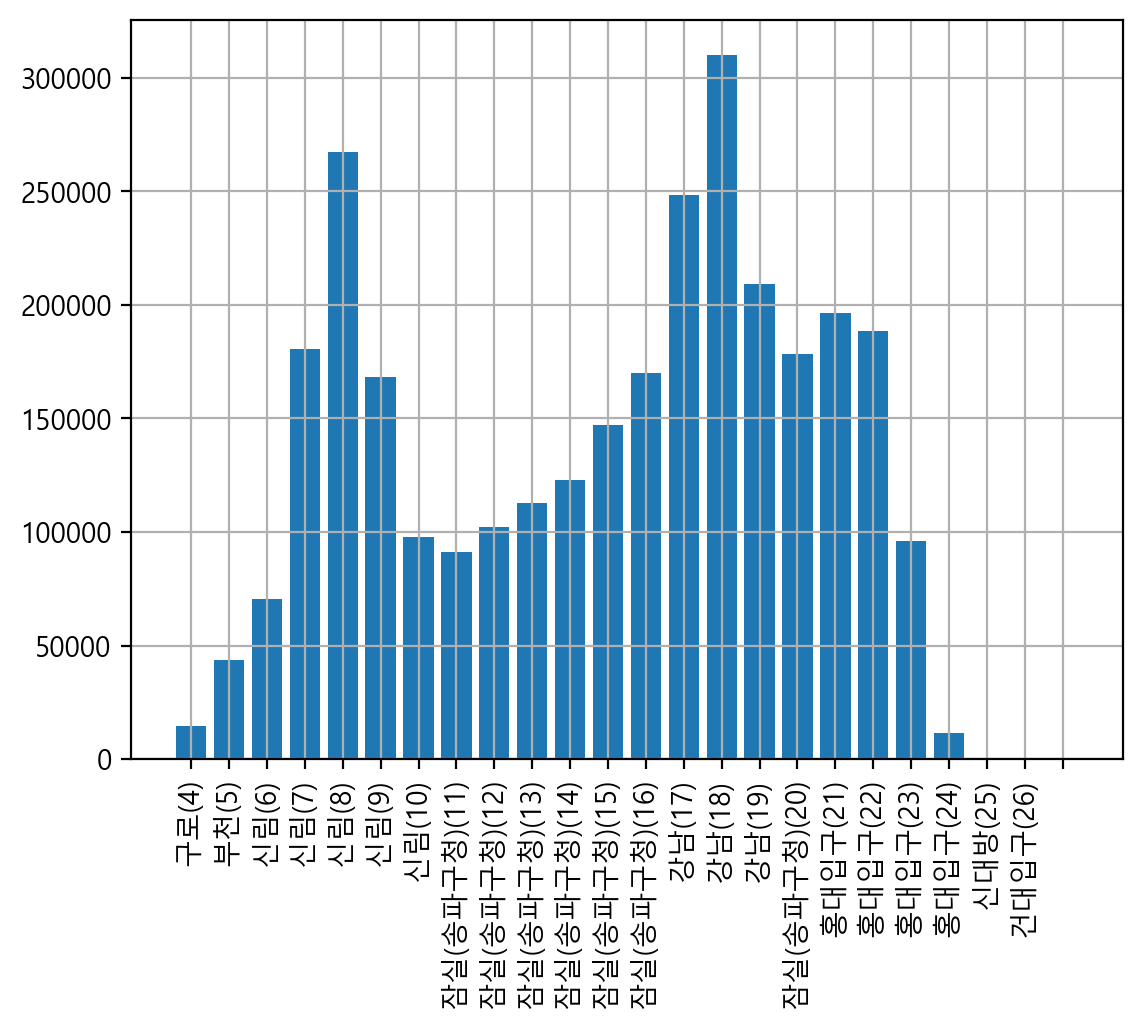

In [9]:
# 시간대별 최대 승차 역 이름 및 승차 인원 막대그래프로 시각화
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
next(data)

max_people = [0] * 24
max_station = [''] * 24

for row in data :
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
        
    row[4:] = map(int, row[4:])
    for j in range(24):
        people = row[2 * j + 4]
        if people > max_people[j]:
            max_people[j] = people
            max_station[j] = row[3] + '(' + str(j + 4) + ')'

f.close()

plt.rc('font', family='Malgun Gothic')

plt.bar(range(24), max_people)
plt.xticks(range(24), max_station, rotation=90)
plt.grid(True)
plt.show()

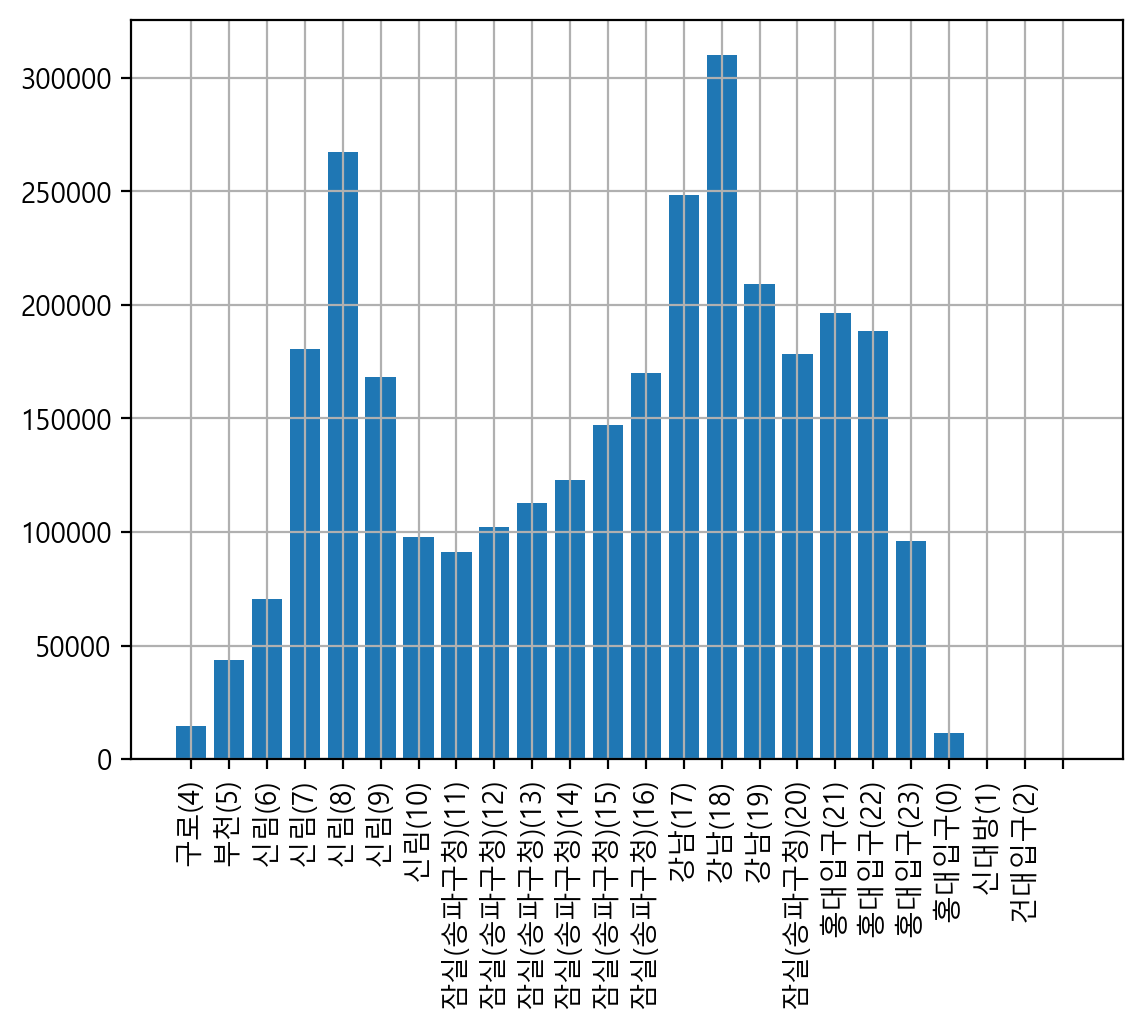

In [10]:
# 시간대별 최대 승차 역 이름 및 승차 인원 막대그래프로 시각화
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
next(data)

max_people = [0] * 24
max_station = [''] * 24

for row in data :
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
        
    row[4:] = map(int, row[4:])
    for j in range(24):
        people = row[2 * j + 4]
        if people > max_people[j]:
            max_people[j] = people
            max_station[j] = row[3] + f'({str((j + 4) % 24)})'

f.close()

plt.rc('font', family='Malgun Gothic')

plt.bar(range(24), max_people)
plt.xticks(range(24), max_station, rotation=90)
plt.grid(True)
plt.show()

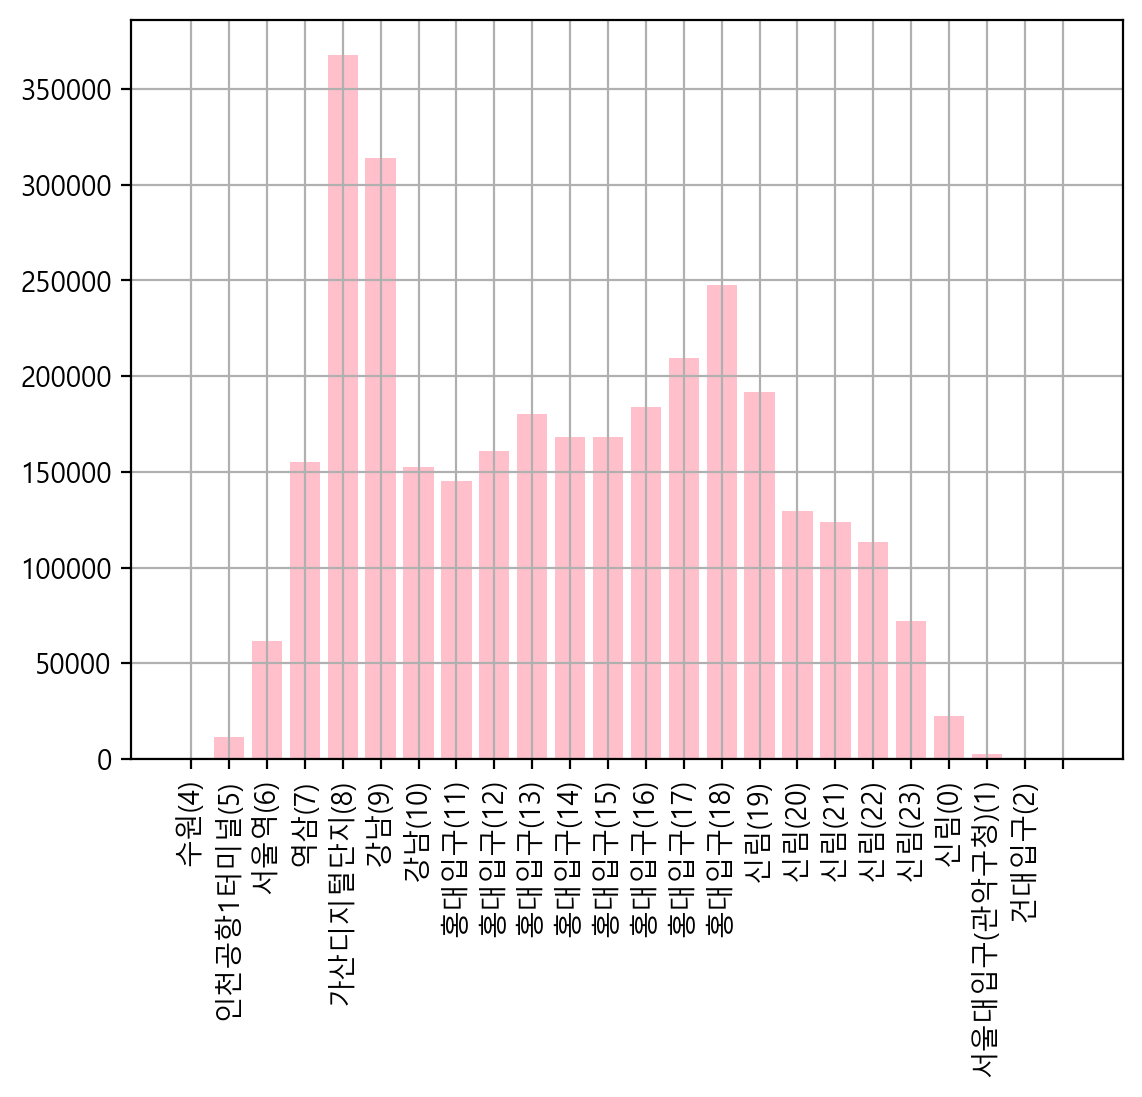

In [11]:
# 시간대별 최대 하차 역 이름 및 하차 인원 막대그래프로 시각화

import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)
next(data)

max_people = [0] * 24
max_station = [''] * 24

for row in data :
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
        
    row[4:] = map(int, row[4:])
    for j in range(24):
        people = row[2 * j + 5]
        if people > max_people[j]:
            max_people[j] = people
            max_station[j] = row[3] + '(' + str((j + 4) % 24) + ')'

f.close()

plt.rc('font', family='Malgun Gothic')

plt.bar(range(24), max_people, color='pink')
plt.xticks(range(24), max_station, rotation=90)
plt.grid(True)
plt.show()

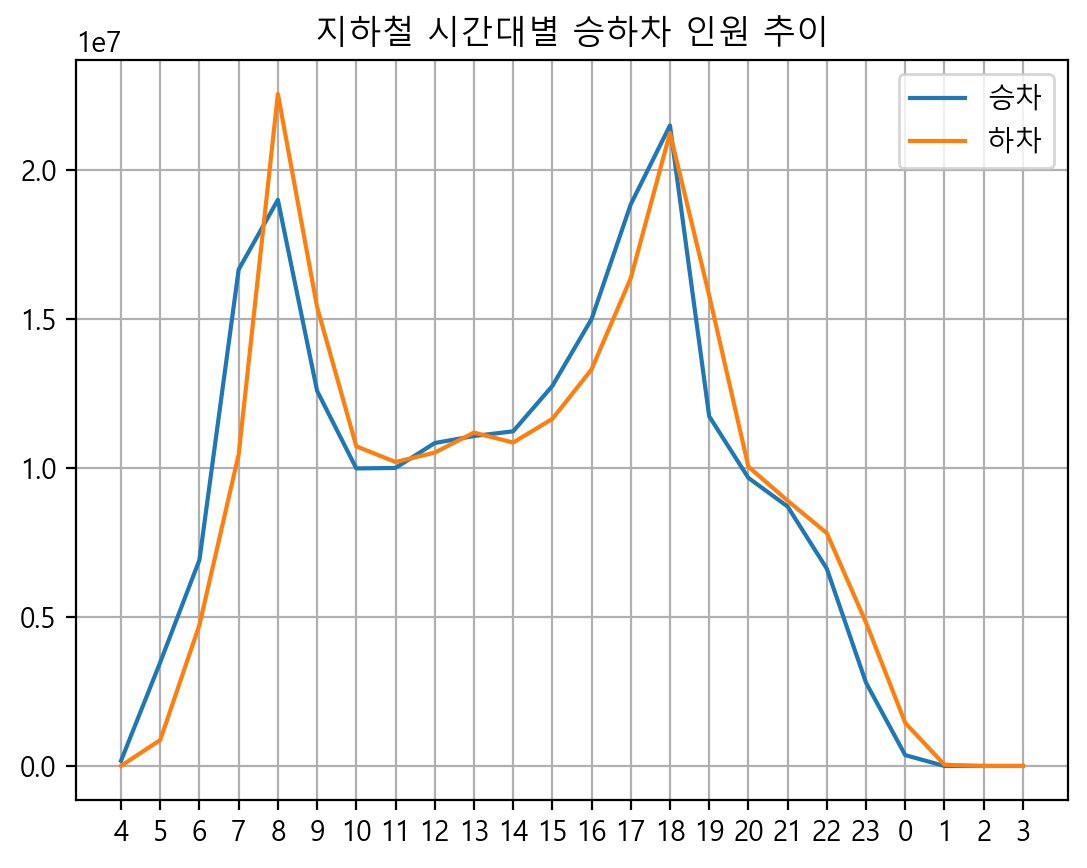

219944293
218933709


In [12]:
# 모든 지하철역의 시간대별 승하차 인원 추이 시각화

import csv
f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data :
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')

    row[4:] = map(int, row[4:])
    for i in range(24) :
        s_in[i] += row[4 + i * 2]
        s_out[i] += row[5 + i * 2]

f.close()

plt.rc('font', family='Malgun Gothic')

# plt.figure(figsize=(10, 6))
# plt.style.use('ggplot')
# plt.style.use('default')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label = '승차')
plt.plot(s_out, label = '하차')
plt.legend()
plt.grid(True)
timelst = map(lambda x: x%24, range(4,28))
plt.xticks(range(24), timelst)
plt.show()

print(sum(s_in))
print(sum(s_out))

###

## 2. 유임ㆍ무임 승차 데이터 시각화

In [13]:
max_people = [0, 0, 0, 0]
print(max_people)

max_people = [0] * 4
print(max_people)

max_people = []
for i in range(4):
    max_people.append(0)
print(max_people)

max_people = [0 for _ in range(4)]
print(max_people)

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]


In [14]:
max_station = ['', '', '', '']
print(max_station)

max_station = [''] * 4
print(max_station)

max_station = []
for i in range(4):
    max_station.append('')
print(max_station)

max_station = ['' for _ in range(4)]
print(max_station)

['', '', '', '']
['', '', '', '']
['', '', '', '']
['', '', '', '']


In [15]:
import csv
f = open('subwayfee.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)

max_station = ['' for _ in range(4)]
max_people = [0 for _ in range(4)]

# index: 4, 5, 6, 7
label = ['유임승차','유임하차','무임승차','무임하차']

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i].replace(',', ''))
        if row[i] > max_people[i-4] :
            max_people[i-4] = row[i]
            max_station[i-4] = row[3] + ' ' + row[1]

f.close()

for i in range(4) :
    print(f'{label[i]}: {max_station[i]}, {max_people[i]} 명')

유임승차: 잠실(송파구청) 2호선, 2168208 명
유임하차: 홍대입구 2호선, 2364679 명
무임승차: 종로3가 1호선, 314434 명
무임하차: 제기동 1호선, 321631 명


#### 모든 역의 유무임 승하차 비율

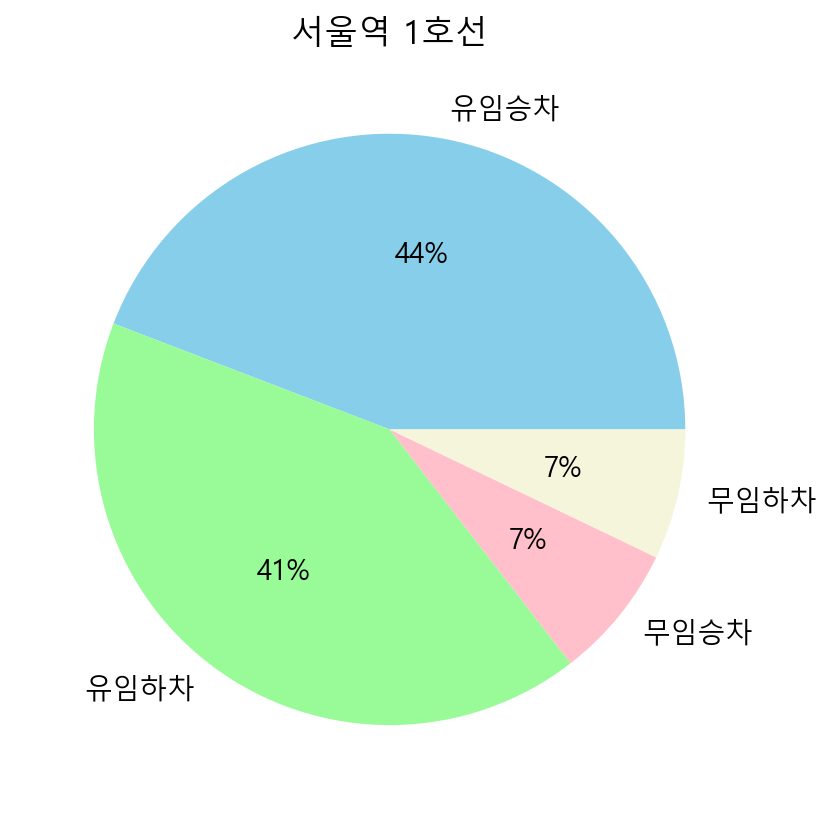

In [16]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

label = ['유임승차','유임하차','무임승차','무임하차']
color = ['skyblue', 'palegreen', 'pink', 'beige']

plt.rc('font', family='Malgun Gothic')
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i].replace(',', ''))

    plt.title(row[3] + ' ' + row[1])    
    plt.pie(row[4:8], labels=label, colors=color, autopct='%1.f%%')
    plt.show()
    break

f.close()

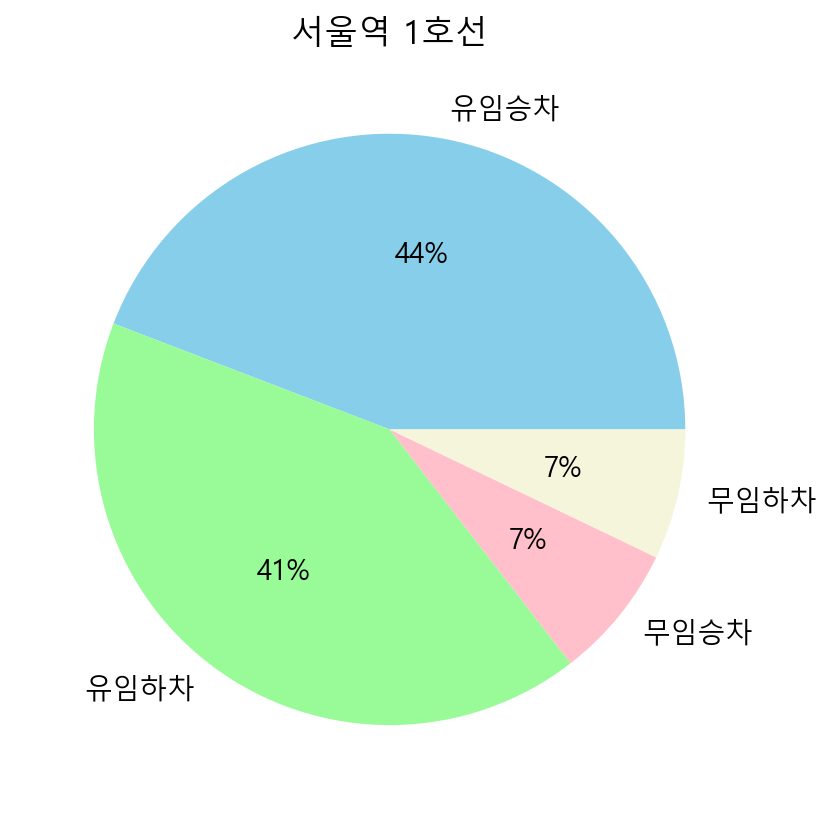

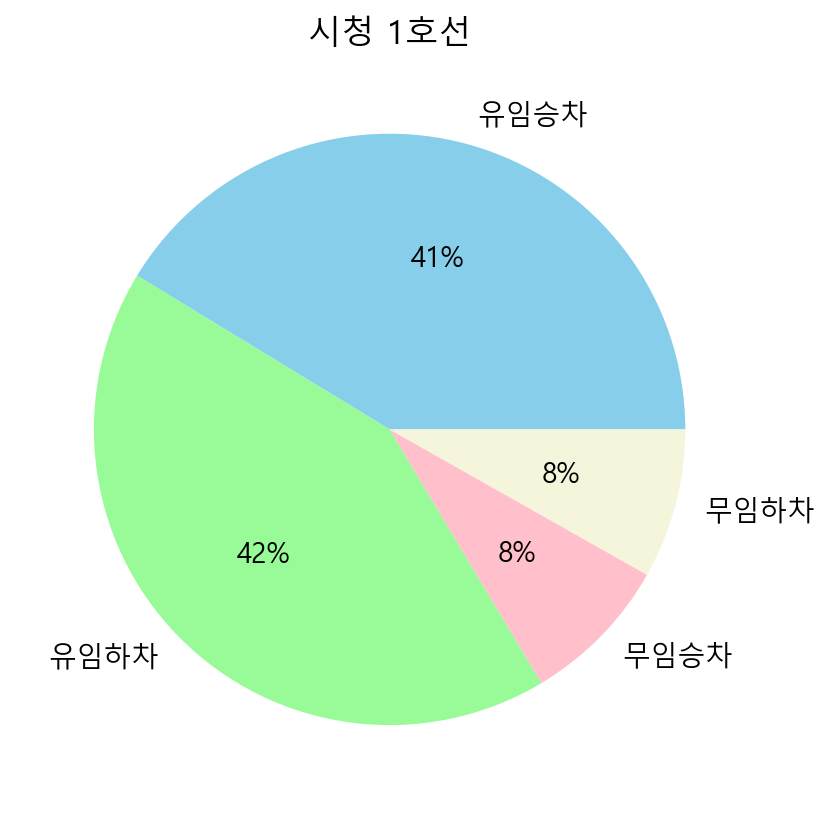

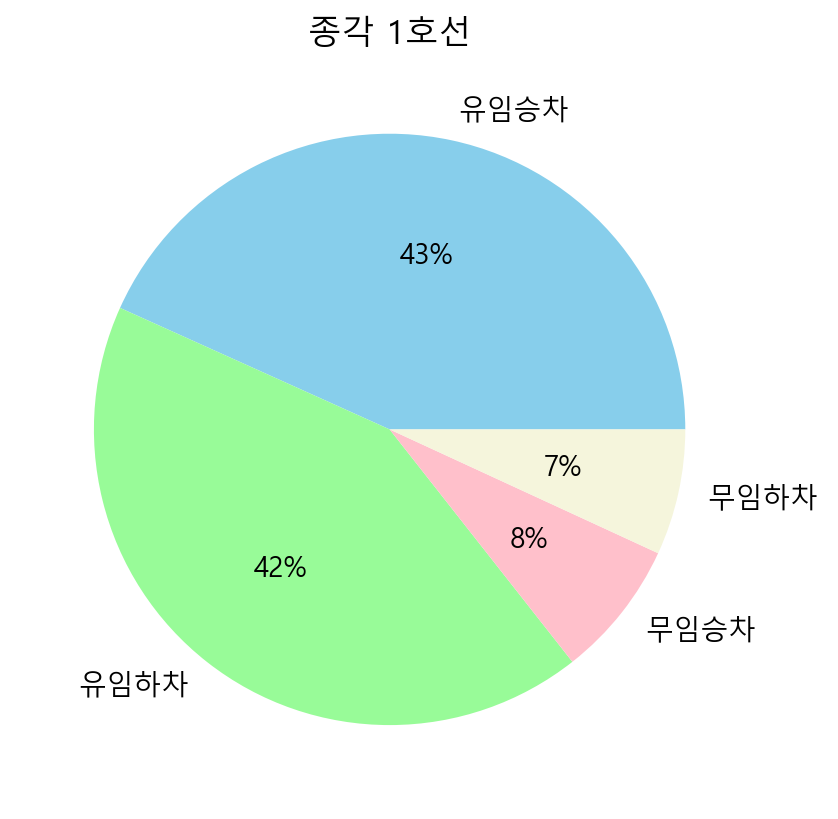

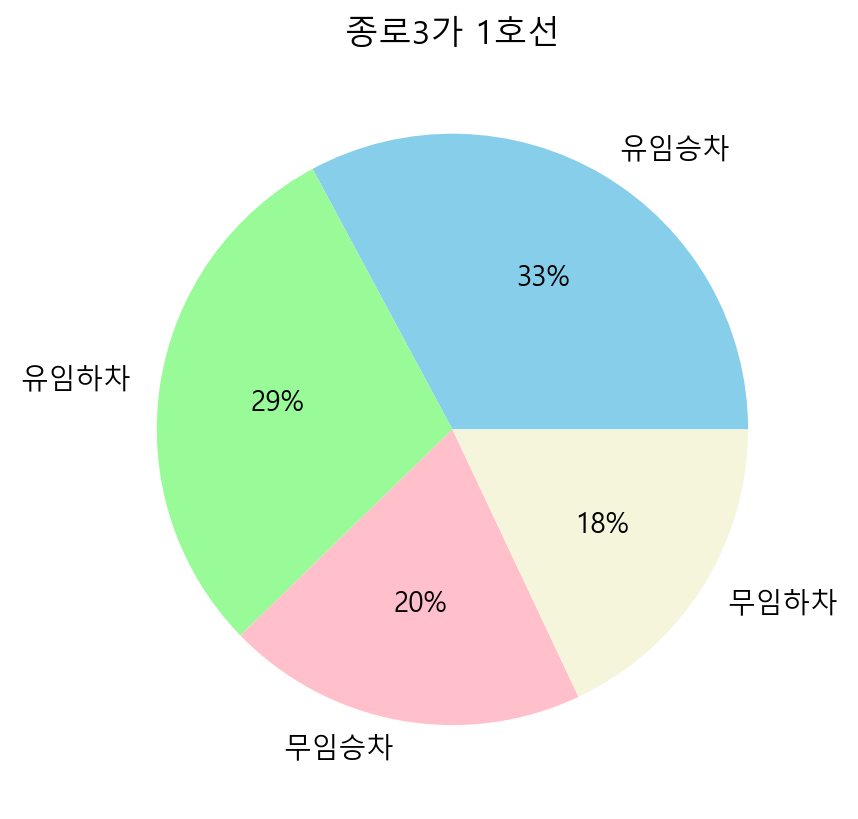

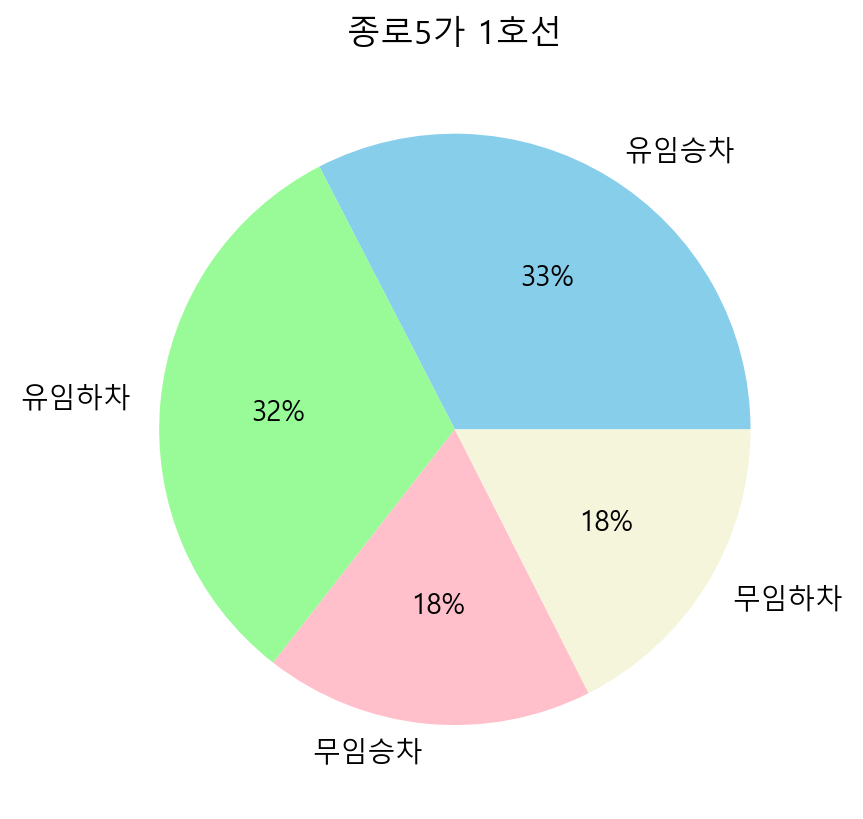

In [17]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

label = ['유임승차','유임하차','무임승차','무임하차']
color = ['skyblue', 'palegreen', 'pink', 'beige']

plt.rc('font', family='Malgun Gothic')

cnt = 0
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i].replace(',', ''))

    plt.title(row[3] + ' ' + row[1])    
    plt.pie(row[4:8], labels=label, colors=color, autopct='%1.f%%')
    plt.savefig(row[3] + ' ' + row[1] + '.png')
    plt.show()
    cnt += 1
    if cnt == 5:
        break

f.close()

# lecture 23

## 수리연산을 위한 numpy 

In [18]:
import numpy as np
np.array([1, 2 , 3])

array([1, 2, 3])

In [19]:
np.empty(2)

array([6.4, 4.8])

In [20]:
a = np.ones(2)
print(a)
print(a.dtype)

[1. 1.]
float64


In [21]:
np.ones(2, dtype=np.int64)

array([1, 1], dtype=int64)

In [22]:
arr = np.array([2, 1, 5, 3, 7, 4, 6, 8])
arr

array([2, 1, 5, 3, 7, 4, 6, 8])

In [23]:
arr.sort()
arr

array([1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
arr = np.array([2, 1, 5, 3, 7, 4, 6, 8])
arr

array([2, 1, 5, 3, 7, 4, 6, 8])

In [25]:
arr.argsort()

array([1, 0, 3, 5, 2, 6, 4, 7], dtype=int64)

In [26]:
print(np.arange(4))
print(np.arange(2, 9, 2))
print(np.arange(1, 5, .7))

[0 1 2 3]
[2 4 6 8]
[1.  1.7 2.4 3.1 3.8 4.5]


In [27]:
print(np.linspace(0, 10, 5))
print(np.linspace(0, 10, num=5))
print(np.linspace(0, 10, num=11))

[ 0.   2.5  5.   7.5 10. ]
[ 0.   2.5  5.   7.5 10. ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


#### 배열의 모양

In [28]:
array_example = np.array([[[0, 1, 2, 3],
                           [4, 5, 6, 7]],
                          [[0, 1, 2, 3],
                           [4, 5, 6, 7]],
                          [[0 ,1 ,2, 3],
                           [4, 5, 6, 7]]])
array_example

array([[[0, 1, 2, 3],
        [4, 5, 6, 7]],

       [[0, 1, 2, 3],
        [4, 5, 6, 7]],

       [[0, 1, 2, 3],
        [4, 5, 6, 7]]])

In [29]:
array_example.ndim

3

In [30]:
array_example.size

24

In [31]:
array_example.shape

(3, 2, 4)

### 모양 바꾸기

In [32]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [33]:
b = a.reshape(3, 2)
print(b)

[[0 1]
 [2 3]
 [4 5]]


### 다차원 모양 수정

In [34]:
data = np.arange(30)
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [35]:
data.reshape(2, 5, 3)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [36]:
a = data.reshape(5, 6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [37]:
import numpy as np

a = np.array([1, 2, 3, 4, 5, 6])
a.shape

(6,)

In [38]:
b = np.expand_dims(a, axis=1)
b.shape

(6, 1)

In [39]:
b

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [40]:
c = np.expand_dims(a, axis=0)
c.shape

(1, 6)

In [41]:
c

array([[1, 2, 3, 4, 5, 6]])

### indexing & slicing

In [42]:
data = np.array([1, 2, 3])
data

array([1, 2, 3])

In [43]:
data[1]

2

In [44]:
data[0:2]

array([1, 2])

In [45]:
data[1:]

array([2, 3])

In [46]:
data[-2:]

array([2, 3])

In [47]:
a = np.arange(1, 31).reshape(5, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [48]:
a[:, :]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [49]:
a[:2]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [50]:
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [51]:
a[:, :2]

array([[ 1,  2],
       [ 7,  8],
       [13, 14],
       [19, 20],
       [25, 26]])

In [52]:
a[1:3, 2:5]

array([[ 9, 10, 11],
       [15, 16, 17]])

### 조건

In [53]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [54]:
a < 5

array([[ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [55]:
print(a[a < 5])

[1 2 3 4]


In [56]:
five_up = (a >= 5)
five_up

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [57]:
print(a[five_up])

[ 5  6  7  8  9 10 11 12]


In [58]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [59]:
a%2==0

array([[False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True]])

In [60]:
divisible_by_2 = a[a%2==0]
divisible_by_2

array([ 2,  4,  6,  8, 10, 12])

In [61]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [62]:
cond = (a > 2) & (a < 11)
cond

array([[False, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False, False]])

In [63]:
c = a[cond]
c

array([ 3,  4,  5,  6,  7,  8,  9, 10])

In [64]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [65]:
five_equal_up = (a > 5) | (a == 5)
print(five_equal_up)

[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]


In [66]:
a[five_equal_up]

array([ 5,  6,  7,  8,  9, 10, 11, 12])

# lecture 24

## 기본 배열 연산

In [67]:
a = np.array([20, 30, 40, 50])
a

array([20, 30, 40, 50])

In [68]:
b = np.arange(4)
b

array([0, 1, 2, 3])

In [69]:
c = a - b
c

array([20, 29, 38, 47])

In [70]:
b

array([0, 1, 2, 3])

In [71]:
b**2

array([0, 1, 4, 9])

In [72]:
a

array([20, 30, 40, 50])

In [73]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [74]:
a < 35

array([ True,  True, False, False])

In [75]:
data = np.array([1, 2])
data

array([1, 2])

In [76]:
ones = np.ones(2, dtype=int)
ones

array([1, 1])

In [77]:
data + ones

array([2, 3])

In [78]:
data - ones

array([0, 1])

In [79]:
data * data

array([1, 4])

In [80]:
data / data

array([1., 1.])

In [81]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [82]:
a.sum()

10

In [83]:
b = np.array([[1, 1], [2, 2]])
b

array([[1, 1],
       [2, 2]])

In [84]:
print(b.sum())
print(b.sum(axis=0))

6
[3 3]


In [85]:
print(b.sum(axis=1))

[2 4]


## 브로드캐스팅 연산 

In [86]:
data = np.array([1.0, 2.0])
data

array([1., 2.])

In [87]:
data * 1.6

array([1.6, 3.2])

In [88]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [89]:
ones_row = np.array([[1, 1]])
ones_row

array([[1, 1]])

In [90]:
data + ones_row

array([[2, 3],
       [4, 5],
       [6, 7]])

In [91]:
data * ones_row

array([[1, 2],
       [3, 4],
       [5, 6]])

In [92]:
a = np.array([0.0, 10.0, 20.0, 30.0])
a = a.reshape(4, 1)
a


array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [93]:
b = np.array([1.0, 2.0, 3.0])
b 

array([1., 2., 3.])

In [94]:
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [95]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
a

array([[ 0.,  0.,  0.],
       [10., 10., 10.],
       [20., 20., 20.],
       [30., 30., 30.]])

In [96]:
b = np.array([1.0, 2.0, 3.0])
b

array([1., 2., 3.])

In [97]:
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [98]:
a

array([[ 0.,  0.,  0.],
       [10., 10., 10.],
       [20., 20., 20.],
       [30., 30., 30.]])

In [99]:
b = np.array([1.0, 2.0, 3.0, 4.0])
b

array([1., 2., 3., 4.])

In [100]:
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

## 난수와 확률분포

In [101]:
from numpy import random

print(random.rand()) # [0, 1) 난수 하나
print(random.rand(3))
print(random.rand(2, 3))

0.9639120203793001
[0.39435938 0.03165136 0.18737523]
[[0.43476186 0.42499468 0.71185924]
 [0.39462482 0.12496287 0.12152917]]


In [102]:
help(random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [103]:
from numpy import random

print(random.random()) # [0, 1) 난수 하나
print(random.random(size=(2,)))
print(random.random(size=2))
print(random.random((2, 3)))

0.813920797328767
[0.74858279 0.45946844]
[0.64282252 0.69577548]
[[0.16740156 0.82952858 0.37586444]
 [0.57889364 0.54950817 0.16888466]]


In [104]:
from numpy import random

print(random.rand(2, 3))
print(random.random((2, 3)))

[[0.54638207 0.74366082 0.59591396]
 [0.97327742 0.10851669 0.55956774]]
[[0.47706893 0.12793235 0.58743933]
 [0.97586853 0.62502601 0.4183743 ]]


In [105]:
from numpy import random

print(random.randn())
print(random.randn(3))
print(random.randn(2, 3))

-0.7211261459061691
[-1.22276872 -0.18728217  0.40848725]
[[-0.33127804  2.49118132  1.57467893]
 [ 1.23360739  1.2760405  -0.5019073 ]]


In [106]:
from numpy import random

print(random.randn()) # 표준 정규분포 N(0, 1)의 난수 발생
print(random.randn(2)) # 표준 정규분포의 난수 2개 생성
print(random.randn(2, 3)) # 표준 정규분포의 난수 6개 생성

0.9059614266981911
[0.74071501 0.26978483]
[[ 1.14016736 -0.33405299  0.00859274]
 [ 0.97762815 -0.57063554 -0.7440712 ]]


In [107]:
from numpy import random

print(random.randint(2)) # [0, 2) 정수 난수
print(random.randint(1, 7)) # [1, 7) 정수 난수
print(random.randint(1, 7, 3)) # [1, 7) 정수 난수 3개
print(random.randint(1, 7, size=(2, 3)))

1
2
[2 5 6]
[[3 3 2]
 [5 6 5]]


In [108]:
from numpy import random

print(sorted(random.choice(range(1, 46), 6)))
print(sorted(random.choice(range(1, 46), 6, replace=False)))

[8, 12, 18, 26, 36, 44]
[8, 13, 19, 28, 36, 42]


In [109]:
from numpy import random

print(random.choice(5, 3))
print(random.choice(5, 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0]))

[1 3 3]
[3 2 0]


In [110]:
from numpy import random

print(random.choice(5, (3, 2)))
print(random.choice(range(1, 46), size=(5, 6), replace=False))

[[3 1]
 [2 0]
 [3 1]]
[[19 21 27 22  5 33]
 [15  8 10 41  7 23]
 [12 42 43  4 37  1]
 [ 6 29 18 11 28 30]
 [24 13  3 44 16  2]]


In [111]:
random.choice(range(1, 30), size=(5, 6), replace=False) # 오류

ValueError: Cannot take a larger sample than population when 'replace=False'

In [112]:
from numpy import random

[sorted(random.choice(range(1, 46), 6, replace=False)) for _ in range(5)]

[[2, 15, 21, 22, 31, 39],
 [12, 18, 27, 32, 35, 41],
 [4, 7, 13, 14, 34, 37],
 [12, 17, 31, 35, 37, 42],
 [1, 8, 11, 25, 30, 32]]

In [113]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected mu

In [114]:
from numpy import random

print(random.uniform()) # 균일 분포 [0, 1)의 난수 발생
print(random.uniform(2)) # 균일 분포 [0, 2)의 난수 발생
print(random.uniform(2, 3)) # 균일 분포 [2, 3)의 난수 발생
print(random.uniform(1, 3, (2, 3))) # 균일 분포 [1, 3)의 난수 [2행 3열] 발생

0.32001728813507524
1.999889058285877
2.493189197860543
[[1.6894698  1.40571511 1.01541913]
 [1.7416366  2.43764285 2.21198283]]


In [115]:
help(random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the ``uniform`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than or equal to high.  The high limit may be included in t

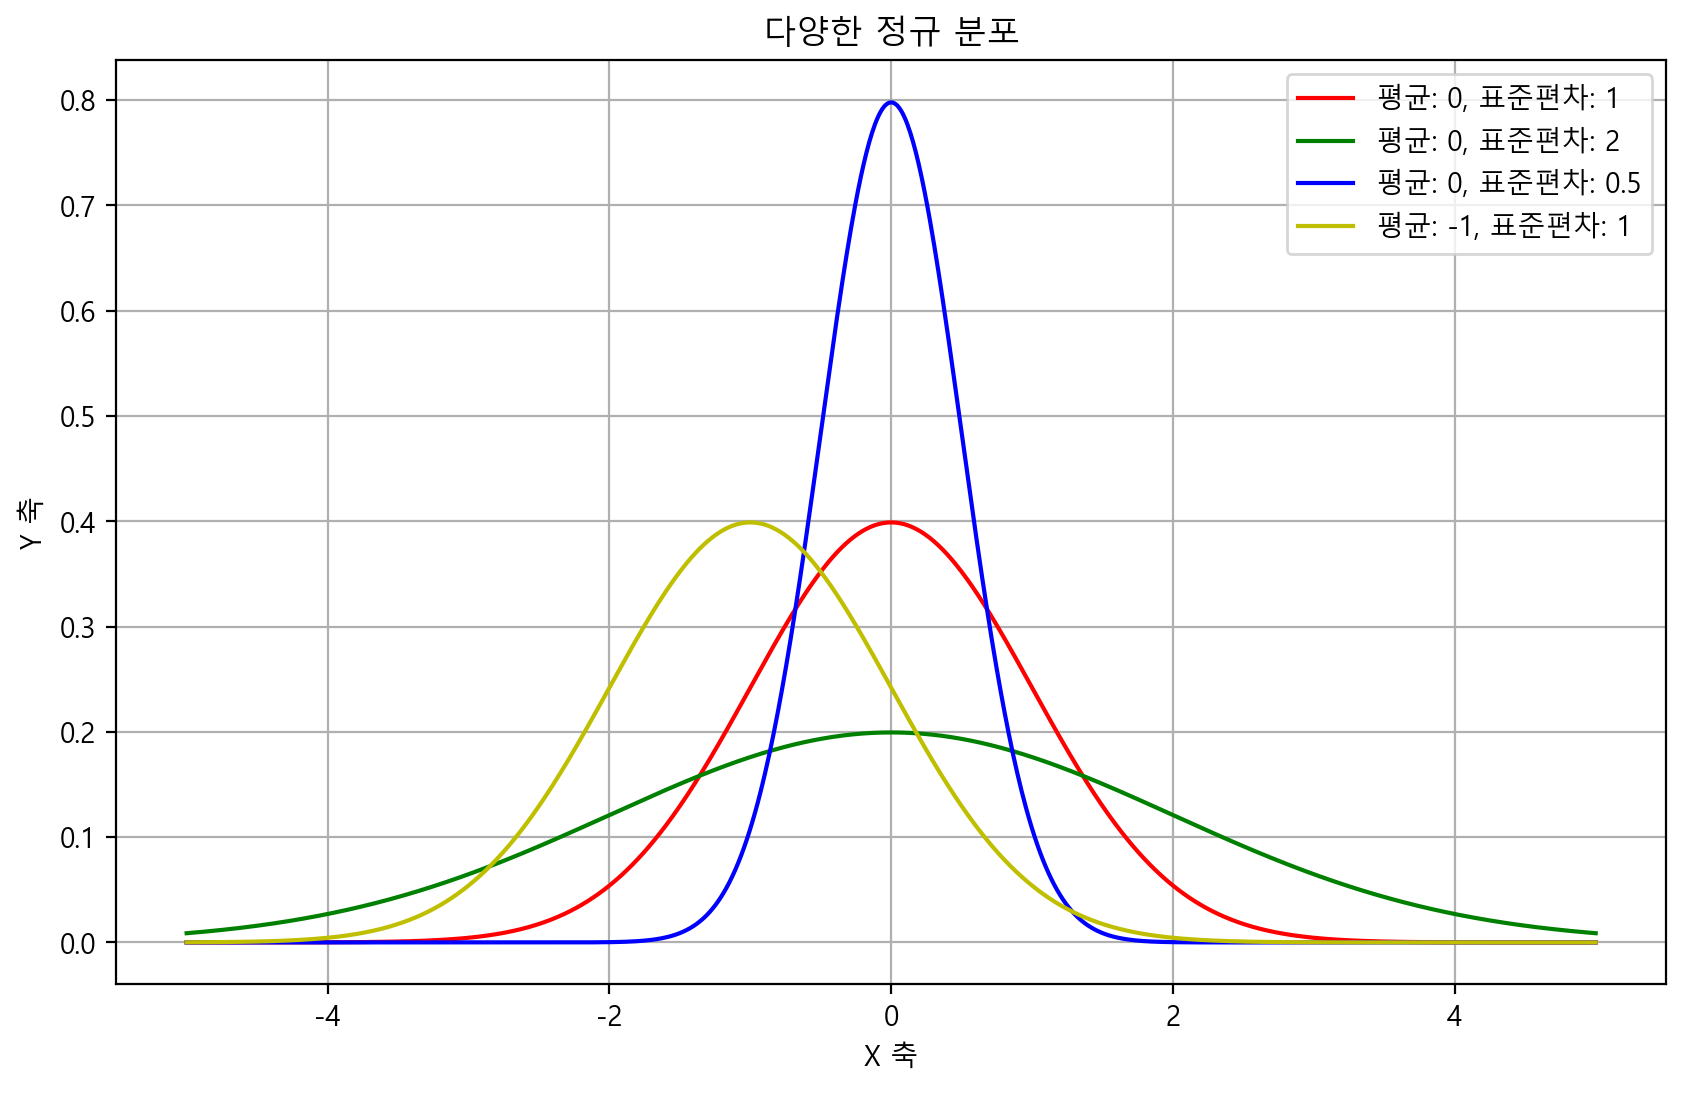

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 정규분포 함수
def normal_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# x 값 범위 설정
x = np.linspace(-5, 5, 1000)  

# 4개의 정규분포의 평균과 표준편차 설정
parameters = [(0, 1, "평균: 0, 표준편차: 1"),
              (0, 2, "평균: 0, 표준편차: 2"),
              (0, 0.5, "평균: 0, 표준편차: 0.5"),
              (-1, 1, "평균: -1, 표준편차: 1")]

# 4개의 정규분포의 그림 색상 설정
colors = ['r', 'g', 'b', 'y']

# 전체 그림 크기 지정
plt.figure(figsize=(10, 6))

# 4개의 정규분포 그리기
for i, (mu, sigma, label) in enumerate(parameters):
    pdf = normal_pdf(x, mu, sigma)
    plt.plot(x, pdf, color=colors[i], label=label)

# 제목과 축 레이블 쓰기
plt.title('다양한 정규 분포')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.legend()
plt.grid(True)
plt.show()

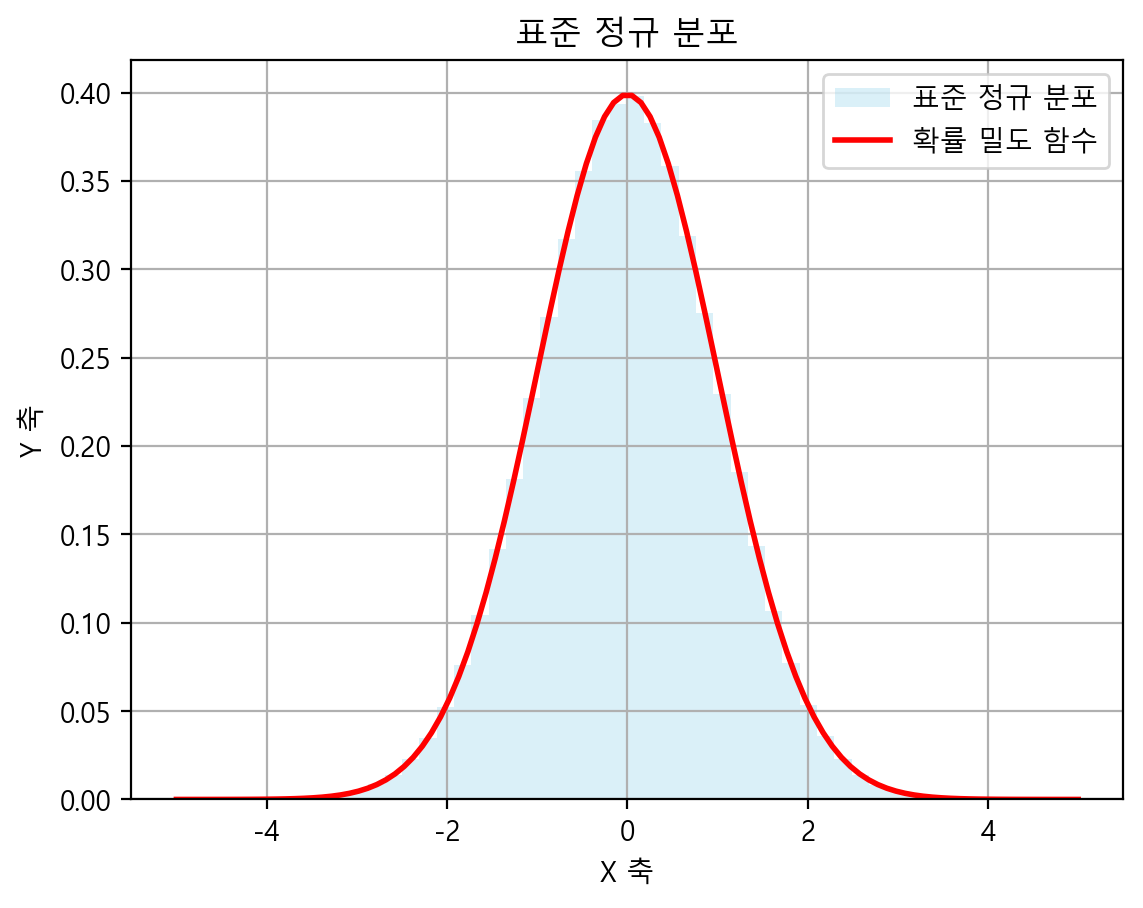

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# 평균(mu)와 표준 편차(sigma) 설정
mu, sigma = 0, 1

# 표준 정규 분포에서 1,000,000개의 샘플 생성
samples = np.random.normal(mu, sigma, 1000000)

# 그래프 그리기
plt.hist(samples, bins=50, density=True, alpha=0.3, color='skyblue', label='표준 정규 분포')
plt.title('표준 정규 분포')
plt.xlabel('X 축')
plt.ylabel('Y 축')

# 표준 정규 분포의 확률 밀도 함수 그리기
x = np.linspace(-5, 5, 100)
pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, pdf, 'r-', linewidth=2, label='확률 밀도 함수')

plt.legend()
plt.grid(True)
plt.show()
